In [1]:

import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
cuda:0


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
global target_order
target_order = "supervised"
global temp_list
temp_list = []
Agent_number_n=4;
Alpha = 0.666;



In [3]:
global temp_list
temp_list = []
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    
    training_data.append(temp_list)
    training_label.append(S)
    

def read_training_data():
    for i in range(100000):
        appen_train(sorted(np.random.rand(Agent_number_n), reverse=True));

training_data=[]
training_label=[]
S=1.0
read_training_data();

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    

def read_testing_data():
#     devided=20
#     for i1 in range(devided+1):
#         for i2 in range(i1+1):
#             for i3 in range(i2+1):
#                 appen_test(i1/devided,i2/devided,i3/devided);
    for i in range(100000):
        appen_test(sorted(np.random.rand(Agent_number_n), reverse=True));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

training_data=np.array(training_data)
training_label=np.array(training_label)
testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(training_data)
print(testing_data)
print(training_label)
print(testing_label)

[[[0.51379444 0.36534875 0.16081841]
  [0.87996153 0.36534875 0.16081841]
  [0.87996153 0.51379444 0.16081841]
  [0.87996153 0.51379444 0.36534875]]

 [[0.44937994 0.43842348 0.30860798]
  [0.52664636 0.43842348 0.30860798]
  [0.52664636 0.44937994 0.30860798]
  [0.52664636 0.44937994 0.43842348]]

 [[0.87582933 0.85798655 0.64644888]
  [0.96432177 0.85798655 0.64644888]
  [0.96432177 0.87582933 0.64644888]
  [0.96432177 0.87582933 0.85798655]]

 ...

 [[0.89154078 0.77605721 0.63588286]
  [0.89232848 0.77605721 0.63588286]
  [0.89232848 0.89154078 0.63588286]
  [0.89232848 0.89154078 0.77605721]]

 [[0.807078   0.48042343 0.12901655]
  [0.83600357 0.48042343 0.12901655]
  [0.83600357 0.807078   0.12901655]
  [0.83600357 0.807078   0.48042343]]

 [[0.62908109 0.54192404 0.05223892]
  [0.6720298  0.54192404 0.05223892]
  [0.6720298  0.62908109 0.05223892]
  [0.6720298  0.62908109 0.54192404]]]
[[[0.41439369 0.34643877 0.19457063]
  [0.61717435 0.34643877 0.19457063]
  [0.61717435 0.4143

In [4]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
training_supervised_label=[]
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(training_data[index][i][0])
        y_list.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    training_supervised_label.append(h_list)
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list))

3.3746336098193193 2.999999999999999 0.37463360981932015


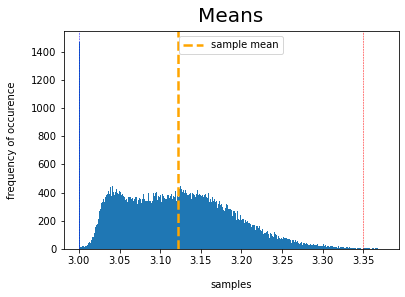

In [5]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.001)], linestyle='--', linewidth=0.5, label="0.1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.999)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [6]:
training_supervised_label=np.array(training_supervised_label)
print(training_supervised_label)

[[1.03770775 1.42767528 1.6132324  1.86889532]
 [1.27945425 1.36371509 1.37741066 1.56402044]
 [2.45773166 2.53516254 2.55077498 2.73587044]
 ...
 [2.39054575 2.39123499 2.49228311 2.61493566]
 [1.45601095 1.48674436 1.89506258 2.23306687]
 [1.23287974 1.27903017 1.38797648 1.98765557]]


In [7]:
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


cuda:0


In [8]:
def weight_init(m):
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)
    elif isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, mean=0.0,std =0.2)
        torch.nn.init.normal_(m.bias, mean=0.0,std =0.01)
#     elif isinstance(m, torch.nn.Parameter):
#         torch.nn.init.normal_(m, mean=0.0,std =0.1)

        

class Net(torch.nn.Module):
    def __init__(self):

        super(Net, self).__init__()
        
        self.input_dim = Agent_number_n-1
        self.hidden_dim = 4
        self.output_dim = 1
        self.hidden_layer_count = 4
        
        current_dim = self.input_dim
        self.layers = torch.nn.ModuleList()
        for i in range(self.hidden_layer_count):
            self.layers.append(torch.nn.Linear(current_dim, self.hidden_dim))
            current_dim = self.hidden_dim
        self.layers.append(torch.nn.Linear(current_dim, self.output_dim))

    def calculate(self, value_list):
        h = value_list
        for layer in self.layers:
            h = torch.relu(layer(h))
        return h

    def forward(self, input_list,input_label,label):
        global iteration,echo,target_order
        loss1 = 0
        loss2 = 0
        input_list = torch.from_numpy(
            np.array(input_list)).cuda().type(torch.float32)
        h_list = []

        if (target_order == "supervised"):
            loss = 0 
            for i in range(Agent_number_n):
                h = self.calculate(input_list[i])
                loss += torch.square(h - label[i])
                h_list.append(h)
            return loss
        else:
            for i in range(Agent_number_n):
                h = self.calculate(input_list[i])
                h_list.append(h)
            input_label = torch.from_numpy(
                np.array(input_label)).cuda().type(torch.float32)
            sum_h = torch.sum(torch.cat(h_list)).cuda()


            loss1 = torch.where((Agent_number_n-1)*input_label>sum_h,
                            torch.square(((Agent_number_n-1)*input_label-sum_h)),
                            torch.zeros(1).cuda()
                          )

            loss2 = torch.where((Agent_number_n-Alpha)*input_label<sum_h,
                            torch.square((sum_h-(Agent_number_n-Alpha)*input_label)),
                            torch.zeros(1).cuda()
                          )

            return loss1,loss2,h_list

In [9]:
random.seed(2000)
torch.manual_seed(256)
net  = Net()
net.apply(weight_init)

#net = torch.load("save/Deep_learning_small_2_4")
net.to(dev)

Net(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=4, bias=True)
    (1): Linear(in_features=4, out_features=4, bias=True)
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): Linear(in_features=4, out_features=4, bias=True)
    (4): Linear(in_features=4, out_features=1, bias=True)
  )
)

In [10]:
#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00001)
optimizer = opt.Adam(net.parameters(), lr=0.001)

batch_size = 64
echo = 1

In [11]:
target_order = "supervised"
for iteration in range(int(echo)):
    # offender_types = []
    # defender_types = []
    
    
    X_train_list = []
    temp_number = 0
    total_batch_loss = 0 
    while(temp_number<len(training_data)-1):
        loss_sum = 0
        denominator = 0
        for index in range(temp_number, min(batch_size+temp_number,len(training_data))):
            h_loss = net(training_data[index],training_label[index],training_supervised_label[index])
            denominator += 1
            loss_sum += h_loss
            
        loss = (loss_sum) / denominator 
        total_batch_loss +=float(loss_sum)
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        temp_number = index
        
        if(random.random()<=0.01):
            print(temp_number,loss,float(loss_sum))


    print("batch iteration", iteration)
    print("batch_loss: %.2f " % (total_batch_loss/len(training_data)))
    
    print()
    print()

3024 tensor([10.0626], device='cuda:0', grad_fn=<DivBackward0>) 644.0074462890625
4347 tensor([9.2458], device='cuda:0', grad_fn=<DivBackward0>) 591.7321166992188
8883 tensor([7.2644], device='cuda:0', grad_fn=<DivBackward0>) 464.9231872558594
13104 tensor([2.1821], device='cuda:0', grad_fn=<DivBackward0>) 139.6562042236328
16128 tensor([0.8670], device='cuda:0', grad_fn=<DivBackward0>) 55.488487243652344
25011 tensor([0.7116], device='cuda:0', grad_fn=<DivBackward0>) 45.54083251953125
35091 tensor([0.5446], device='cuda:0', grad_fn=<DivBackward0>) 34.85334014892578
36351 tensor([0.4510], device='cuda:0', grad_fn=<DivBackward0>) 28.86712074279785
36666 tensor([0.4493], device='cuda:0', grad_fn=<DivBackward0>) 28.75774574279785
56007 tensor([0.0823], device='cuda:0', grad_fn=<DivBackward0>) 5.266883850097656
68103 tensor([0.0314], device='cuda:0', grad_fn=<DivBackward0>) 2.006680965423584
68166 tensor([0.0295], device='cuda:0', grad_fn=<DivBackward0>) 1.884972333908081
80010 tensor([0.0

In [12]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))

3.453647564633583 2.206629991531372 1.247017573102211


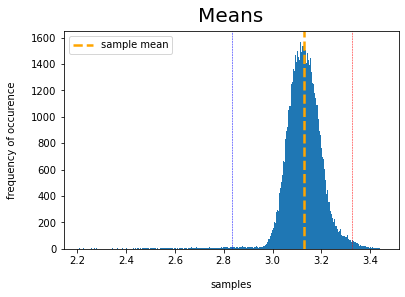

In [13]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [14]:
torch.save(net, "save/Deep_learning_small_2_4")

In [15]:
#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00005)
optimizer = opt.Adam(net.parameters(), lr=0.0001)

batch_size = 64
echo = 1

In [16]:
target_order = "unsupervised"
for iteration in range(int(echo)):
    # offender_types = []
    # defender_types = []
    
    
    X_train_list = []
    temp_number = 0
    total_batch_loss = 0 
    while(temp_number<len(training_data)-1):
        
        loss2_list = []
        loss1_sum = 0
        loss2_sum = 0
        denominator = 0
        for index in range(temp_number, min(batch_size+temp_number,len(training_data))):
            h_loss1,h_loss2,h_list = net(training_data[index],training_label[index],0)
            denominator += 1
            loss1_sum += h_loss1
            loss2_sum += h_loss2
            
        loss_sum = loss1_sum + loss2_sum
        loss = (loss_sum) / denominator 
        total_batch_loss +=float(loss_sum)
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        temp_number = index
        
        if(random.random()<=0.01):
            print(temp_number,loss,float(loss1_sum),float(loss2_sum))


    print("batch iteration", iteration)
    print("batch_loss: %.2f " % (total_batch_loss/len(training_data)))
    
    print()
    print()

4032 tensor([1.2066e-06], device='cuda:0', grad_fn=<DivBackward0>) 0.0 7.722288137301803e-05
7371 tensor([0.0010], device='cuda:0', grad_fn=<DivBackward0>) 0.0542634092271328 0.008763736113905907
9450 tensor([0.0002], device='cuda:0', grad_fn=<DivBackward0>) 0.006404489744454622 0.008306201547384262
15687 tensor([0.0039], device='cuda:0', grad_fn=<DivBackward0>) 0.23743289709091187 0.012622109614312649
17451 tensor([0.0007], device='cuda:0', grad_fn=<DivBackward0>) 1.3835187928634696e-05 0.04204230755567551
23247 tensor([4.9450e-05], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.003164797555655241
28287 tensor([6.8613e-05], device='cuda:0', grad_fn=<DivBackward0>) 0.0036097958218306303 0.0007814184646122158
37926 tensor([0.0035], device='cuda:0', grad_fn=<DivBackward0>) 0.22079703211784363 0.0038619786500930786
45045 tensor([7.0658e-05], device='cuda:0', grad_fn=<DivBackward0>) 0.0038185829762369394 0.0007035387679934502
50715 tensor([0.0005], device='cuda:0', grad_fn=<DivBackward0>) 

In [17]:
torch.save(net, "save/Deep_learning_small_2_4")

In [18]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))

3.537434320089965 2.452507495880127 1.084926824209838


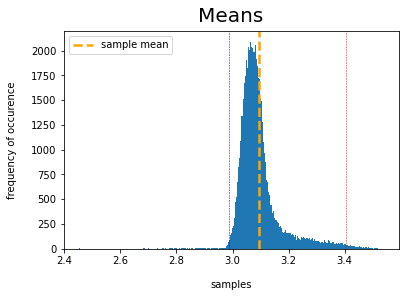

In [19]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()